# Graded Challenge 2

# Logistic Regression dan SVM

Nama : Raditya Saputra

Batch : 007 FTDS

# Pengenalan

Data ini berisi sekitar 10 tahun pengamatan cuaca harian dari banyak lokasi di seluruh Negara Australia. Data ini berasal dari : https://www.kaggle.com/jsphyg/weather-dataset-rattle-package/code?datasetId=6012&sortBy=voteCount&language=Python

# Konteks

Memprediksi hujan hari berikutnya (RainTomorrow) dengan melatih model klasifikasi logistik regression & SVM pada variabel target RainTomorrow

# Import Library

In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

# Load Dataset

In [2]:
df = pd.read_csv('weatherAUS.csv')
pd.set_option('display.max_columns', None)

# Analisis Data Eksplorasi

- Menampilkan 5 dataset teratas

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


- Menampilkan 5 dataset terbawah

In [4]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,ESE,17.0,17.0,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


- Menampilkan informasi seluruh kolum dataset

In [5]:
nama_kolum = df.columns
nama_kolum

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

- Menampilkan informasi tipe dataset dan isian data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Ringkasan
- Dari informasi diatas didapatkan 2 tipe data dalam dataset berupa numerik (float64) dan katerogi (object). Selanjutnya tipe data date akan dirubah menjadi datetime untuk dipisahkan menjadi tahun, bulan, hari, lalu menghapus data datetime

In [7]:
# Preproccessing Data Datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date', axis=1, inplace=True)

- Menampilkan kembali informasi tipe data dan isian dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

Ringkasan
- Sekarang dataset terdapat 2 jenis tipe data numerik (float64, int64) dan kategori (object), serta kolum bertambah menjadi 25
- Penambahan kolum Year, Month dan Day dan penghapusan kolum Date

# Visualisasi Missing Values Dataset

<AxesSubplot:>

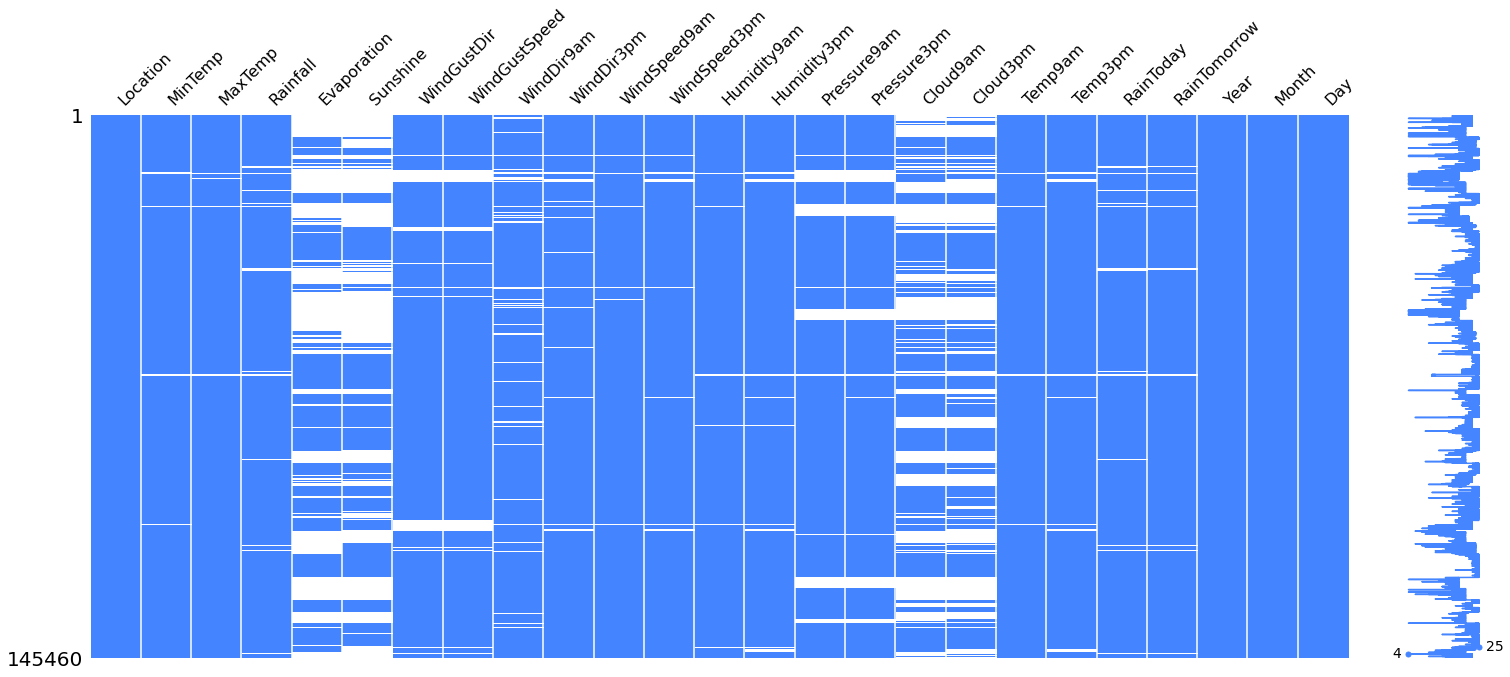

In [9]:
msno.matrix(df, color=(0.27, 0.52, 1.0))

<AxesSubplot:>

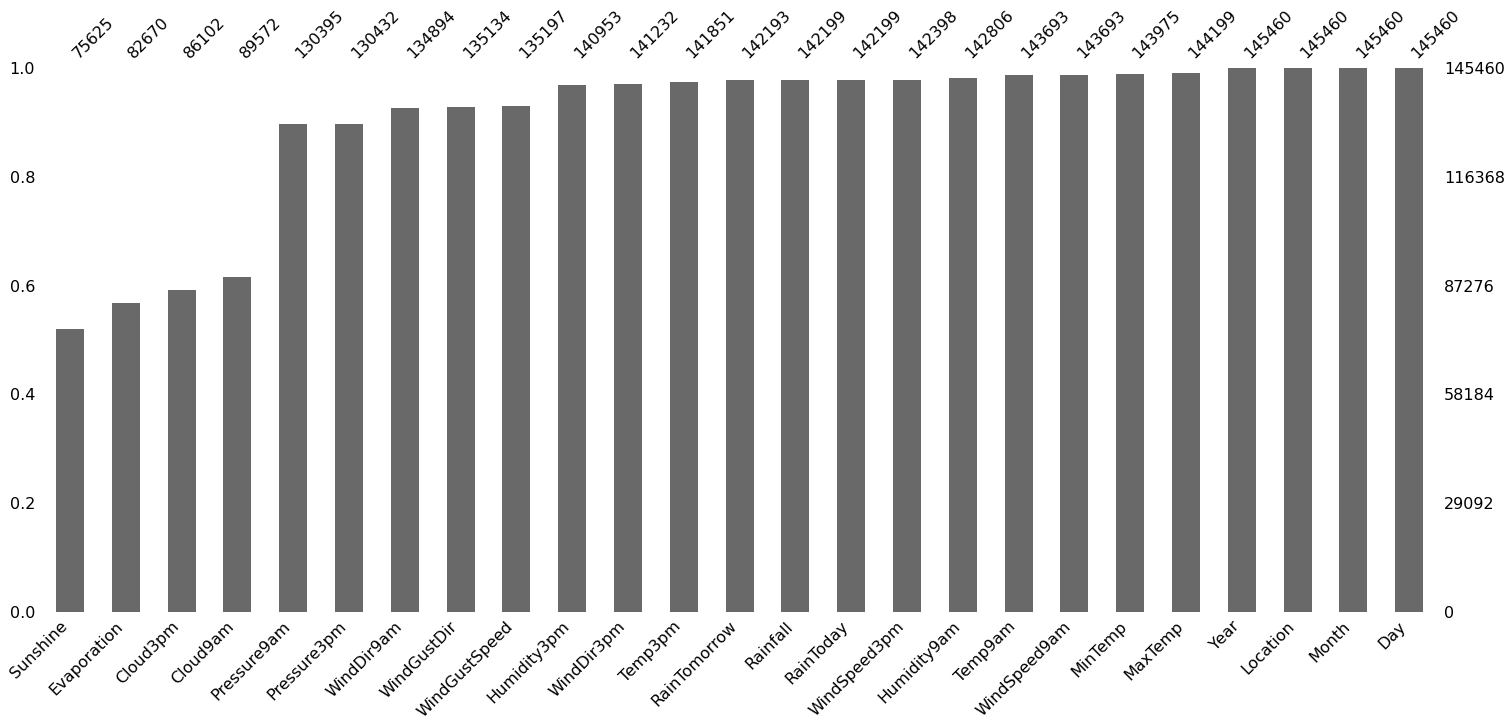

In [10]:
msno.bar(df, sort='ascending')

Ringkasan
- Missing values pada dataset terdapat pada 21 kolum;
- Missing values yang terbanyak pada kolum Sunshine dan hanya terisi 75625 data
- 4 kolum yang terisi penuh; Location, Year, Month, Day

# Visualisasi Korelasi dataset

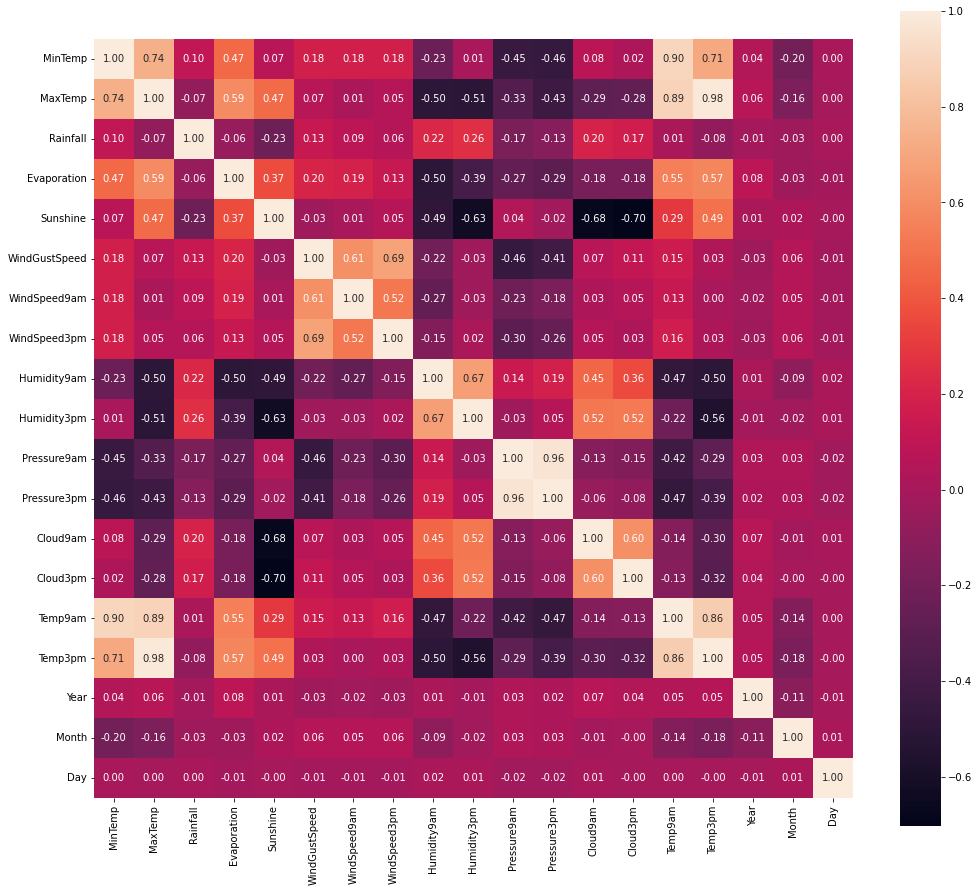

In [11]:
plt.figure(figsize=(17,15))
ax = sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)          
plt.show()

Ringkasan
- Korelasi yang paling tinggi yaitu pada fitur ; 
- MaxTemp dengan Temp3pm sebesar 0.98
- Pressure9am dengan Pressure 3am sebesar 0.96 
- Temp9am dengan MinTemp sebesar 0.90

# Ekplorasi Tipe Data Kategori

- Menampilkan informasi statistika dataset tipe data kategori

In [12]:
kategori = [var for var in df.columns if df[var].dtype=='O']
print ('terdapat {} tipe data kategori'.format(len(kategori)))
print ('antara lain : ', kategori)
df.describe(include=['object'])

terdapat 6 tipe data kategori
antara lain :  ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,135134,134894,141232,142199,142193
unique,49,16,16,16,2,2
top,Canberra,W,N,SE,No,No
freq,3436,9915,11758,10838,110319,110316


- Visualisasi antara RainTomorrow yes atau no

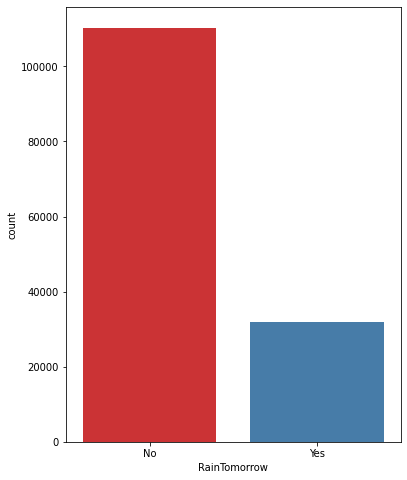

In [13]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=df, palette="Set1")
plt.show()

In [14]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

Ringkasan
- Persentase untuk RainTomorrow No sebesar 0.75 dan Yes 0.21
- Sebaran nilai Yes pada RainTomorrow 31877 dan No 110316
- Distribusi data RainTomorrow Imbalanced, didominasi oleh No

In [15]:
df['RainTomorrow'].value_counts()/len(df)

No     0.758394
Yes    0.219146
Name: RainTomorrow, dtype: float64

- Menampilkan jumlah distribusi masing masing label pada tipe data kategori

In [16]:
for var in kategori: 
    
    print(df[var].value_counts())

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown         3009


# Eksplorasi Tipe Numerik

- Menampilkan informasi statistika dataset tipe data numerikal

In [17]:
numerik = [var for var in df.columns if df[var].dtype!='O']
print ('terdapat {} tipe data numerik'.format(len(numerik)))
print ('antara lain : ', numerik)
df.describe()

terdapat 19 tipe data numerik
antara lain :  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,145460.000000,145460.000000,145460.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,2012.769751,6.399615,15.712258
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,2.537684,3.427262,8.794789
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,2013.000000,6.000000,16.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,2017.000000,12.000000,31.000000


- menampikan informasi data yang hilang pada tipe data numerik

In [18]:
df[numerik].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
Year                 0
Month                0
Day                  0
dtype: int64

- Visualisasi distribusi MaxTemp, Temp3pm, Pressure9am, Pressure3am

Text(0, 0.5, 'RainTomorrow')

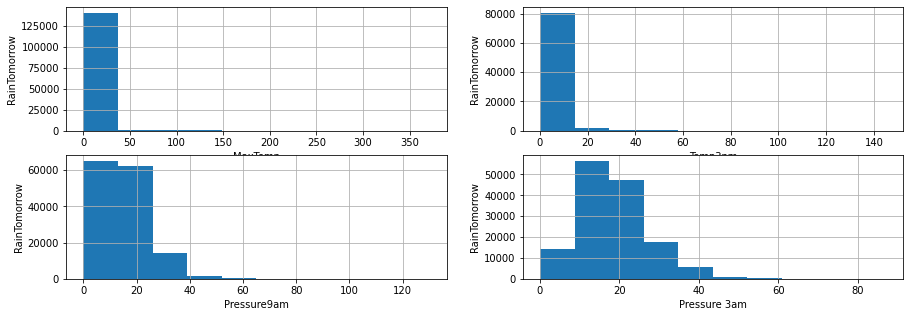

In [19]:
plt.figure(figsize=(15,5))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('MaxTemp')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Temp3pm')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('Pressure9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('Pressure 3am')
fig.set_ylabel('RainTomorrow')

Ringkasan : Distribusi tidak normal / Positif skewed

- Visualisasi Boxplot untuk melihat outliers

Text(0, 0.5, 'MinTemp')

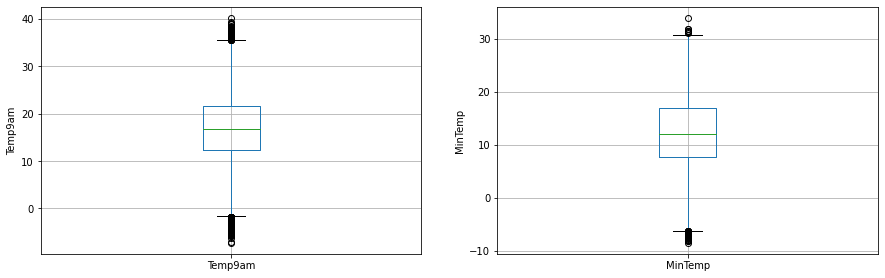

In [20]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Temp9am')
fig.set_title('')
fig.set_ylabel('Temp9am')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='MinTemp')
fig.set_title('')
fig.set_ylabel('MinTemp')

Ringkasan : Terdapat outliers pada Temp9am dan MinTemp

# Pemilihan Fitur dan Target

In [21]:
X = df.drop(['RainTomorrow'], axis=1)
y = df[['RainTomorrow']]

Ringkasan
- Pemilihan target (y) yaitu RainTomorrow
- Metode yang digunakan ialah Binary Classification

# Splitting Data Training dan Testing

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Ringkasan
- Splitting data dibagi dengan proporsi data Train sebanyak 70% dan Test sebanyak 30%

# Fitur Engineering

- Handling Missing Values X_train dan X_test

In [23]:
numerik = [col for col in X_train.columns if X_train[col].dtypes != 'O']

for df_n in [X_train, X_test]:
    for col in numerik:
        col_median=X_train[col].median()
        df_n[col].fillna(col_median, inplace=True)

Ringkasan 
- Handling missing values pada tipe data numerik X_train akan di isikan nilai median
- Handling missing values pada tipe data numerik X_test akan di isikan nilai median X_train

In [24]:
for df_k in [X_train, X_test]:
    df_k['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df_k['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df_k['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df_k['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

Ringkasan 
- Handling missing values pada tipe data kategori X_train akan di isikan modus, label yang paling banyak muncul
- Handling missing values pada tipe data numerik X_test akan di isikan modus label pada X_train

- Handling Missing Values y_train dan y_test

In [25]:
y_train['RainTomorrow'].fillna(y_train['RainTomorrow'].mode()[0], inplace=True)
y_test['RainTomorrow'].fillna(y_train['RainTomorrow'].mode()[0], inplace=True)

- Handling missing values pada tipe data kategori y_train akan di isikan modus, label yang paling banyak muncul
- Handling missing values pada tipe data numerik y_test akan di isikan modus label pada X_train

- Label Encoder untuk target RainTomorrow

In [26]:
le = LabelEncoder()
y_train['RainTomorrow'] = le.fit_transform(y_train['RainTomorrow'])
y_test['RainTomorrow'] = le.transform(y_test['RainTomorrow'])

- Memasukan seluruh tipe data kategorikal X_train pada variabel untuk dilakukan OneHot Encoder 

In [27]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

In [28]:
X_train[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
141565,Darwin,E,SE,E,No
85325,Brisbane,E,WSW,ENE,No
17847,Newcastle,W,N,SE,Yes
69746,Melbourne,SE,SSW,SSE,No
98356,Adelaide,S,SSW,SSE,Yes


- Encoding

In [29]:
encod = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

categorical_cols = X_train.select_dtypes('object').columns.tolist()
encod.fit(X_train[categorical_cols].fillna('Unknown'))
encod_cols = list(encod.get_feature_names(categorical_cols))
X_train[encod_cols] = encod.transform(X_train[categorical_cols].fillna('Unknown'))
X_train

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
141565,Darwin,22.2,34.2,0.0,4.8,11.1,E,48.0,SE,E,19.0,19.0,66.0,27.0,1013.3,1009.4,1.0,1.0,25.7,33.4,No,2015,6,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
85325,Brisbane,16.9,31.4,0.0,4.6,11.5,E,20.0,WSW,ENE,7.0,7.0,50.0,50.0,1013.3,1011.4,1.0,2.0,24.7,29.4,No,2012,3,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17847,Newcastle,8.8,20.9,2.4,4.8,8.4,W,39.0,N,SE,28.0,19.0,39.0,52.0,1017.6,1015.2,6.0,5.0,17.0,21.1,Yes,2016,9,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
69746,Melbourne,12.0,22.6,0.0,2.0,1.3,SE,28.0,SSW,SSE,11.0,19.0,70.0,52.0,1017.6,1015.2,5.0,5.0,16.7,21.1,No,2015,9,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
98356,Adelaide,11.8,21.3,1.2,4.8,9.1,S,35.0,SSW,SSE,13.0,17.0,75.0,60.0,10

In [30]:
X_test[encod_cols] = encod.transform(X_test[categorical_cols].fillna('Unknown'))
X_test

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
100721,MountGambier,15.0,18.9,4.2,6.6,8.0,NNW,54.0,NNW,NW,24.0,31.0,73.0,64.0,1005.2,1003.7,4.0,5.0,17.3,17.6,Yes,2012,4,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30234,Sydney,13.1,26.8,0.0,4.6,10.9,W,39.0,W,WNW,22.0,15.0,61.0,22.0,1013.0,1009.0,0.0,1.0,16.9,25.9,No,2008,3,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
68427,Melbourne,19.0,29.0,0.0,11.0,5.6,N,59.0,N,N,39.0,22.0,50.0,38.0,1006.5,1003.4,5.0,5.0,24.2,27.2,No,2011,12,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28624,Richmond,18.1,32.2,0.0,2.1,8.4,NE,30.0,N,NE,0.0,17.0,99.0,51.0,1019.2,1014.6,5.0,5.0,20.9,31.6,No,2013,3,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
31173,Sydney,13.9,19.6,14.0,1.2,5.4,SSW,50.0,SW,S,17.0,22.0,90.0,64.0,

- Menghapus tipe data kategorikal yang sudah di encoding pada X_train dan X_test

In [31]:
X_train = X_train.drop(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], axis=1)
X_test = X_test.drop(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], axis=1)

- Scalling menggunakan MinMaxScaler

In [32]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Pemodelan Logistic Regrission dan SVM

In [33]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

# Model Evalution

# Predict X_train dan y_train

In [34]:
y_pred_train = logreg.predict(X_train)
y_pred_train

array([0, 0, 0, ..., 0, 1, 0])

In [35]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8481


# Predict X_test dan y_test

In [36]:
y_pred_test = logreg.predict(X_test)
y_pred_test

array([1, 0, 0, ..., 1, 0, 1])

In [37]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8493


# Bandingkan akurasi antara train-set & test-set

In [38]:
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8481
Test set score: 0.8493


In [39]:
#from sklearn import svm
#clf_svc = svm.SVC(kernel='linear')
#clf_svc.fit(X_train,y_train)
#y_pred = clf_svc.predict(X_test)
#score = accuracy_score(y_test,y_pred)
#print('Accuracy :',score)
# 18 menit running, acc 0.84

# Kesimpulan
1. Data ini berisi sekitar 10 tahun pengamatan cuaca harian dari banyak lokasi di seluruh Negara Australia, dengan jumlah baris 145460 dan 23 kolum
2. Terdapat 2 tipe data dalam dataset berupa numerik dan katerogi. 
3. Tipe data date akan dirubah menjadi datetime untuk dipisahkan menjadi tahun, bulan, hari, lalu menghapus data datetime
4. Dataset kolum bertambah menjadi 25 dengan penambahan kolum Year, Month dan Day dan penghapusan kolum Date
5. 21 kolum terdapat missing values
6. Missing values yang terbanyak pada kolum Sunshine dan hanya terisi 75625 data
7. 4 kolum yang terisi penuh; Location, Year, Month, Day
8. Korelasi yang paling tinggi yaitu pada fitur ; 
- MaxTemp dengan Temp3pm sebesar 0.98
- Pressure9am dengan Pressure 3am sebesar 0.96 
- Temp9am dengan MinTemp sebesar 0.90
9. Pemilihan target (y) yaitu RainTomorrow
10. Metode yang digunakan ialah Binary Classification
11. Splitting data dibagi dengan proporsi data Train sebanyak 70% dan Test sebanyak 30%
12. Fitur enggineering yang dilakukan ialah dengan menggunakan :
- Median pada distribusi numerik karena menunjukkan positif skewness
- Mode pada distribusi kategori karena menunjukkan bergantung pada informasi data yang ada
- labelencoder pada target (y)
- onehotencoder pada fitur (X)
- Scalling menggunakan MinMaxScaller
13. Pemodelan dilakukan dengan Logistic Regression
- untuk prediksi X_train dan y_train accuracy yang didapat 0.8481
- untuk prediksi X_test dan y_test accuracy yang didapat 0.8493
- perbandingan akurasi training set dengan test set 0.841 : 0.8493 model tidak menunjukkan overfit dan underfit karena tidak terdapat gap yang terlalu besar antara train set dan test set
14. Pemodelan dilakukan dengan SVM 
- didapat accuracy 0.84 dengan membutuhkan waktu selama 18 menit

# Model Inferance

In [40]:
X_val = np.random.randint(10, size=(101822,118))
ynew = logreg.predict(X_val)
ynew

array([1, 1, 0, ..., 0, 1, 0])